### Read data from location

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Markdown, display
from matplotlib.ticker import FuncFormatter

### Utility Functions

In [2]:

def custom_print(string):
    display(Markdown(string))

In [3]:
def get_country_info(cntry):
    cntry_name_to_print = "**" + cntry + "**"
    custom_print(cntry_name_to_print)
    data_cntry = data[data['country'] == cntry]
    
    get_cntry_description(data_cntry)
    grouped_by_age = get_split_by_age(data_cntry)
    plot_by_agecatg(cntry, grouped_by_age)
    

In [4]:
def get_cntry_description(data_cntry):
    custom_print("*Description*")    
    print(data_cntry.describe())
    print("\n")

In [5]:
def get_split_by_age(data_cntry):
    custom_print("*Split By Source*")  
    grouped_data =data[['converted','age_category']].groupby(['age_category']).mean().reset_index()
    print(grouped_data.sort_values(by=['converted'], ascending=False)) 
    print("\n")
    return grouped_data

In [6]:
def plot_by_agecatg(cntry, grouped_by_age):
    ax = sns.barplot(x='age_category', y='converted', data=grouped_by_age , color = 'salmon')
    ax.set_title('Mean Conversion Rate per Country', fontsize=16)
    ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 
    


In [7]:
func_group_age = lambda row: 'Cat1' if row.age < 31 else ('Cat2' if row.age < 51 else ('Cat3' if  row.age < 71 else 'Cat4'))

In [8]:
func_existing_users = lambda row: 1 - row.new_user

In [9]:
func_user_category = lambda row: 'New' if row.new_user == 1 else 'Old'

In [10]:
def get_count_bar_plot_by_age(cntry, data_cntry):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
    sns.countplot(x='age_category', hue='converted', data=data_cntry, ax=ax[0], palette = 'colorblind')
    ax[0].set_title(cntry + ': Count Plot of Age Category', fontsize=16)
    ax[0].set_yscale('log')
    sns.barplot(x='age_category', y='converted', data=data_cntry, ax=ax[1])
    ax[1].set_title(cntry +': Mean Conversion Rate per Age Category', fontsize=16)
    plt.tight_layout()
    plt.show()

### Load Dataset

In [11]:
data = pd.read_csv("/Users/uditanand/Downloads/conversion_data.csv")
data.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


### Data Exploration

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316200 entries, 0 to 316199
Data columns (total 6 columns):
country                316200 non-null object
age                    316200 non-null int64
new_user               316200 non-null int64
source                 316200 non-null object
total_pages_visited    316200 non-null int64
converted              316200 non-null int64
dtypes: int64(4), object(2)
memory usage: 14.5+ MB


In [13]:
data.describe()

,age,new_user,total_pages_visited,converted
count,316200.000000,316200.000000,316200.000000,316200.000000
mean,30.569858,0.685465,4.872966,0.032258
std,8.271802,0.464331,3.341104,0.176685
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,123.000000,1.000000,29.000000,1.000000


In [14]:
data.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


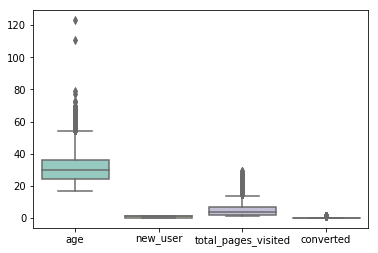

In [15]:
ax = sns.boxplot(data=data, orient="v", palette="Set3")

### Remove Outliers

In [16]:
data[data['age'] > 90]

,country,age,new_user,source,total_pages_visited,converted
90928,Germany,123,0,Seo,15,1
295581,UK,111,0,Ads,10,1


In [17]:
# Since there are only two outliers in age. We can remove them.
data = data[data['age'] < 90]
data.shape

(316198, 6)

In [18]:
data['age'].describe()

count    316198.000000
mean         30.569311
std           8.268958
min          17.000000
25%          24.000000
50%          30.000000
75%          36.000000
max          79.000000
Name: age, dtype: float64

## Insight Generation

### Feature Engineering

In [19]:
#Combine age into categories 
    #Cat1: Upto 30 years 
    #Cat2: 31-50 years
    #Cat3: 50-70 years
    #Cat4: 71 and upwards
data['age_category'] = data.apply(func_group_age, axis=1)

In [20]:
#Calculate the number of existing users
data['existing_users'] = data.apply(func_existing_users, axis=1) 

In [21]:
#Classify each user as new or existing
data['user_category'] = data.apply(func_user_category, axis=1) 

In [22]:
data.head()

,country,age,new_user,source,total_pages_visited,converted,age_category,existing_users,user_category
0,UK,25,1,Ads,1,0,Cat1,0,New
1,US,23,1,Seo,5,0,Cat1,0,New
2,US,28,1,Seo,4,0,Cat1,0,New
3,China,39,1,Seo,5,0,Cat2,0,New
4,US,30,1,Seo,6,0,Cat1,0,New


### Insights

#### Traffic Per Country

   country  total_pages_visited
3       US               878022
0    China               348809
2       UK               246221
1  Germany                67755


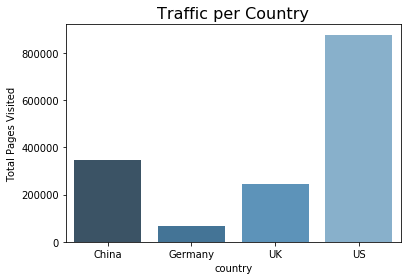

In [23]:
grouped_total_pages_visted = data[['total_pages_visited', 'country']].groupby('country').sum().reset_index()
ax= sns.barplot(x='country', y='total_pages_visited', data=grouped_total_pages_visted, palette = 'Blues_d')
ax.set_yscale('linear')
ax.set_title('Traffic per Country', fontsize=16)
ax.set_ylabel('Total Pages Visited')
print(grouped_total_pages_visted.sort_values(by=['total_pages_visited'], ascending=False)) 

<font color='PURPLE'>
<p>
[INSIGHT] The website seems to be hosted in United States. 
 <br>China and UK are close but China races past UK. 
 <br>Germany lags significantly.
</p>
</font>

#### Number of Conversions Per Country and Mean conversion rate Per Country

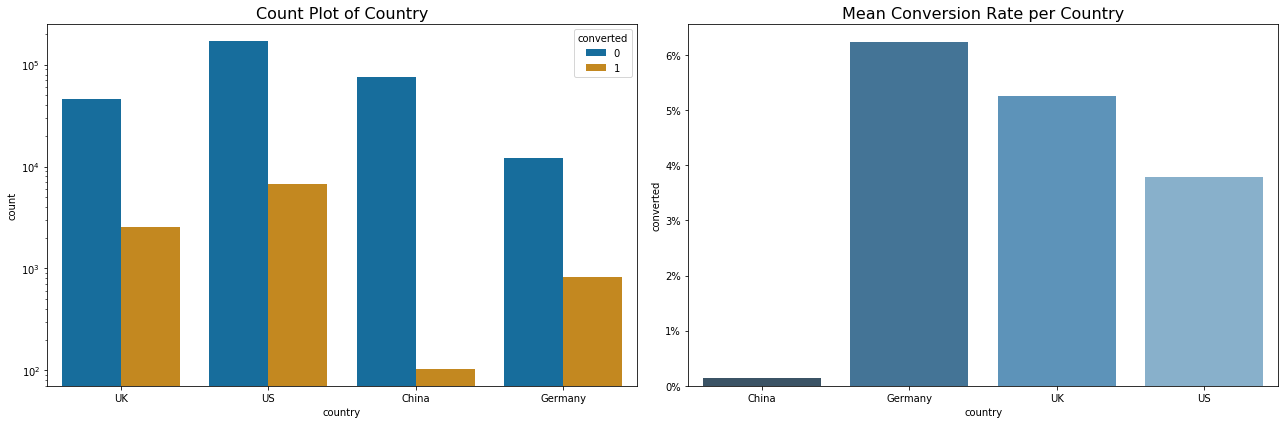

Mean Conversion Rate per Country
   country  converted
1  Germany   0.062428
2       UK   0.052612
3       US   0.037801
0    China   0.001332


In [24]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

#Number of Converted - Count plot
sns.countplot(x='country', hue='converted', data=data, ax=ax[0], palette = 'colorblind')
ax[0].set_title('Count Plot of Country', fontsize=16)
ax[0].set_yscale('log')

#Mean Conversion Rate per country 
grouped_converted = data[['country', 'converted']].groupby('country').mean().reset_index()
sns.barplot(x='country', y='converted', data=grouped_converted , ax=ax[1], palette = "Blues_d");
ax[1].set_title('Mean Conversion Rate per Country', fontsize=16)
ax[1].yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 

plt.tight_layout()
plt.show()

print("Mean Conversion Rate per Country")
print(grouped_converted.sort_values(by=['converted'], ascending=False)) 


<font color='PURPLE'>
<p>
[INSIGHT] China even though has the second largest amount of traffic has the lowest conversion rate whereas Germany having the least amount of traffic has the highest conversion rate.
<br> Chinese users are coming on the website but they are not converting.    
</p>
</font>

In [25]:
### Country Specific Data Exploration

#### Total Pages Visited and Mean Conversion Rate per Age Category

##### Overall

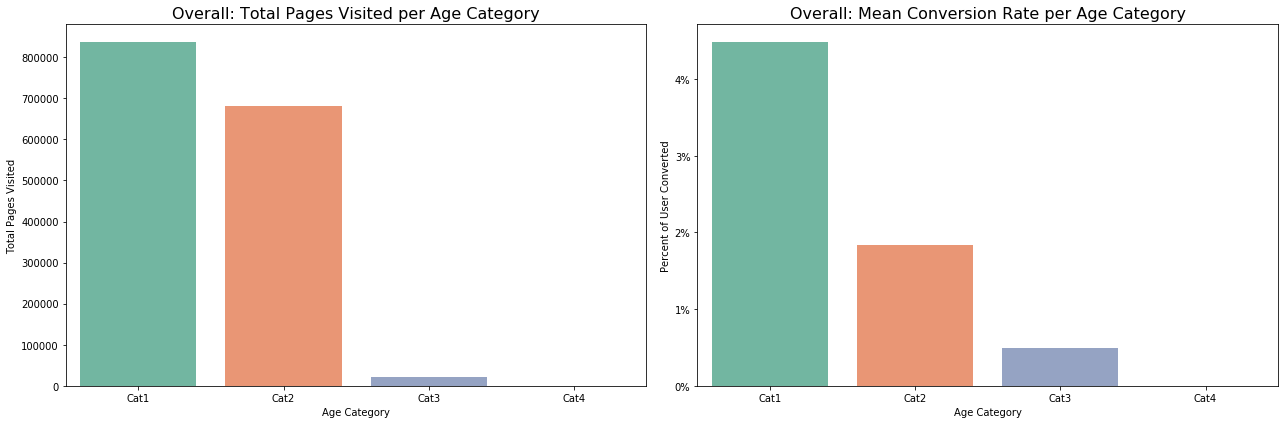

In [26]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

grouped_total_pages_data =data[['total_pages_visited', 'age_category']].groupby(['age_category']).sum().reset_index()   
sns.barplot(x='age_category', y='total_pages_visited', data=grouped_total_pages_data, ax=ax[0], palette = "Set2");
ax[0].set_title('Overall: Total Pages Visited per Age Category', fontsize=16)
ax[0].set_ylabel('Total Pages Visited')
ax[0].set_xlabel('Age Category')

grouped_age_data =data[['converted', 'age_category']].groupby(['age_category']).mean().reset_index()   
ax[1] = sns.barplot(x='age_category', y='converted', data=grouped_age_data,ax=ax[1],palette = "Set2");
ax[1].set_title('Overall: Mean Conversion Rate per Age Category', fontsize=16)
ax[1].yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 
ax[1].set_ylabel('Percent of User Converted')
ax[1].set_xlabel('Age Category')

plt.tight_layout()
plt.show()

#print("Overall: Total Pages Visited per Age Category")
#print(grouped_total_pages_data.sort_values(by=['total_pages_visited'], ascending=False))
#print('\n')
#print("Overall: Mean Conversion Rate per Age Category")
#print(grouped_age_data.sort_values(by=['converted'], ascending=False))


<font color='PURPLE'>
<p>
[INSIGHT] The majority of the traffic is from ages between 17-50 years. It seems the website caters predominantly to the "young adult" population.
<br> [Cat1: less than 30 years]: From the approx 80K pages visited arund 4.5 percent are converted.
<br> [Cat2: 31-50 years]: From the approx 60K pages visited around 2 percent are converted.
<br> [Cat3: 51-70]: From the approx 21K pages visited only 0.04 percent are converted. 
<br> [Cat4: 71 and upwards]: Only 14 pages visited in total and none of them are converted.
<br> <br> Since majority of the traffic is from Cat1 and Cat2 it makes sense to explore them further to further increase the 
    conversion rate.
</p>
</font>

##### Country Breakdown

In [27]:
data_us = data[data['country'] == 'US']
data_uk = data[data['country'] == 'UK']
data_china = data[data['country'] == 'China']
data_germany = data[data['country'] == 'Germany']

###### Age Category Exploration

In [28]:
#total pages by age catg
grouped_total_pages_data_us =data_us[['total_pages_visited','age_category']].groupby(['age_category']).sum().reset_index()
grouped_total_pages_data_uk =data_uk[['total_pages_visited','age_category']].groupby(['age_category']).sum().reset_index()
grouped_total_pages_data_china =data_china[['total_pages_visited','age_category']].groupby(['age_category']).sum().reset_index()
grouped_total_pages_data_germany =data_germany[['total_pages_visited','age_category']].groupby(['age_category']).sum().reset_index()

#converted by age catg
grouped_age_data_us =data_us[['converted','age_category']].groupby(['age_category']).mean().reset_index()
grouped_age_data_uk =data_uk[['converted','age_category']].groupby(['age_category']).mean().reset_index()
grouped_age_data_china =data_china[['converted','age_category']].groupby(['age_category']).mean().reset_index()
grouped_age_data_germany =data_germany[['converted','age_category']].groupby(['age_category']).mean().reset_index()

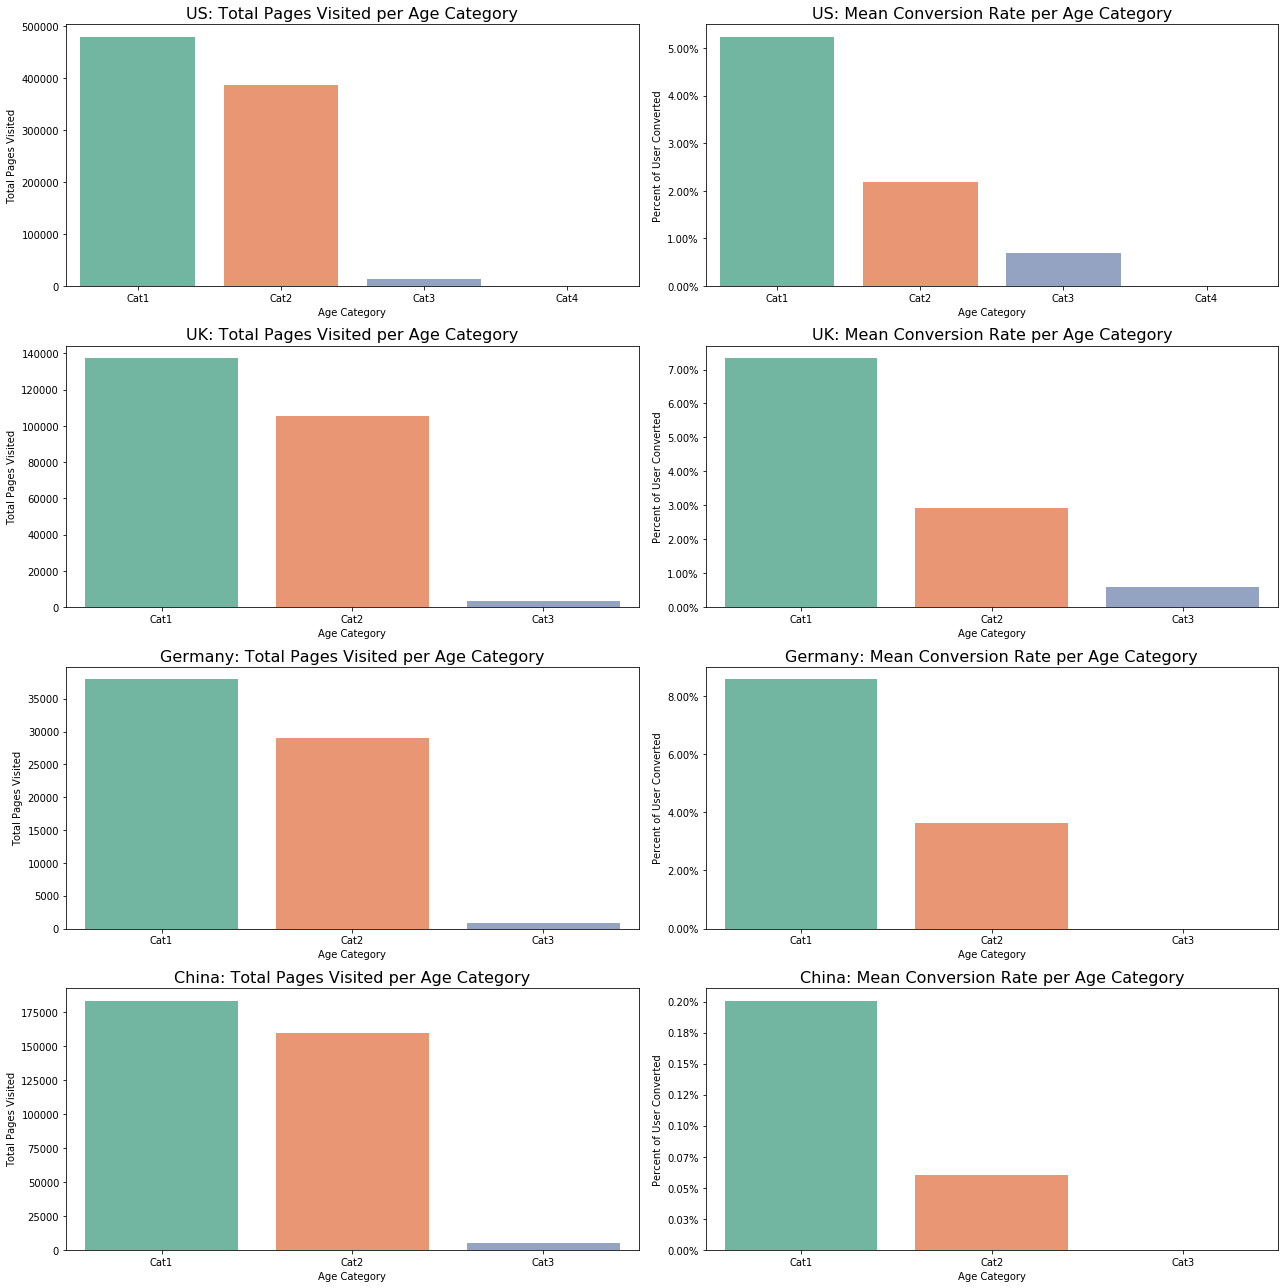

In [29]:
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(18, 18))

#Total Pages Visited per Age Category for each country 
#US
sns.barplot(x='age_category', y='total_pages_visited', data=grouped_total_pages_data_us, ax=ax[0][0], palette="Set2");
ax[0][0].set_title('US: Total Pages Visited per Age Category', fontsize=16)
ax[0][0].set_xlabel('Age Category')
ax[0][0].set_ylabel('Total Pages Visited')

sns.barplot(x='age_category', y='converted', data=grouped_age_data_us, ax=ax[0][1], palette="Set2");
ax[0][1].set_title('US: Mean Conversion Rate per Age Category', fontsize=16)
ax[0][1].yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.2%}'.format(y))) 
ax[0][1].set_ylabel('Percent of User Converted')
ax[0][1].set_xlabel('Age Category')

#UK
sns.barplot(x='age_category', y='total_pages_visited', data=grouped_total_pages_data_uk, ax=ax[1][0], palette = "Set2");
ax[1][0].set_title('UK: Total Pages Visited per Age Category', fontsize=16)
ax[1][0].set_xlabel('Age Category')
ax[1][0].set_ylabel('Total Pages Visited')

sns.barplot(x='age_category', y='converted', data=grouped_age_data_uk, ax=ax[1][1], palette = "Set2");
ax[1][1].set_title('UK: Mean Conversion Rate per Age Category', fontsize=16)
ax[1][1].yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.2%}'.format(y))) 
ax[1][1].set_ylabel('Percent of User Converted')
ax[1][1].set_xlabel('Age Category')

#Germany
sns.barplot(x='age_category', y='total_pages_visited', data=grouped_total_pages_data_germany, ax=ax[2][0], palette = "Set2");
ax[2][0].set_title('Germany: Total Pages Visited per Age Category', fontsize=16)
ax[2][0].set_xlabel('Age Category')
ax[2][0].set_ylabel('Total Pages Visited')

sns.barplot(x='age_category', y='converted', data=grouped_age_data_germany, ax=ax[2][1], palette = "Set2");
ax[2][1].set_title('Germany: Mean Conversion Rate per Age Category', fontsize=16)
ax[2][1].yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.2%}'.format(y))) 
ax[2][1].set_ylabel('Percent of User Converted')
ax[2][1].set_xlabel('Age Category')


#China
sns.barplot(x='age_category', y='total_pages_visited', data=grouped_total_pages_data_china, ax=ax[3][0], palette = "Set2");
ax[3][0].set_title('China: Total Pages Visited per Age Category', fontsize=16)
ax[3][0].set_xlabel('Age Category')
ax[3][0].set_ylabel('Total Pages Visited')

sns.barplot(x='age_category', y='converted', data=grouped_age_data_china, ax=ax[3][1], palette = "Set2");
ax[3][1].set_title('China: Mean Conversion Rate per Age Category', fontsize=16)
ax[3][1].yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.2%}'.format(y))) 
ax[3][1].set_ylabel('Percent of User Converted')
ax[3][1].set_xlabel('Age Category')

plt.tight_layout()
plt.show()


<font color='PURPLE'>
<p>
[INSIGHT] 
<br> [USA]: Achieves a rough 3.5 % conversion rate between total traffic from Cat1 and Cat2.
<br> [UK]: Achieves an impressive .
<br> [Germany]: Germany seems to be doing really well. Out of 35K pages visited roughly 8% are converted. Consumers are readily buying the products/services being offered on the German website.
<br> [China]: There is a huge traffic volume from Cat1 and Cat2 but a very small percent is converted. 
<br> <br> Overall, the Chinese conversion rate is really poor. UK and Germany perform well in the main categories and US is average.
</p>
</font>

#### Total Pages Visited and Mean Conversion Rate per Source

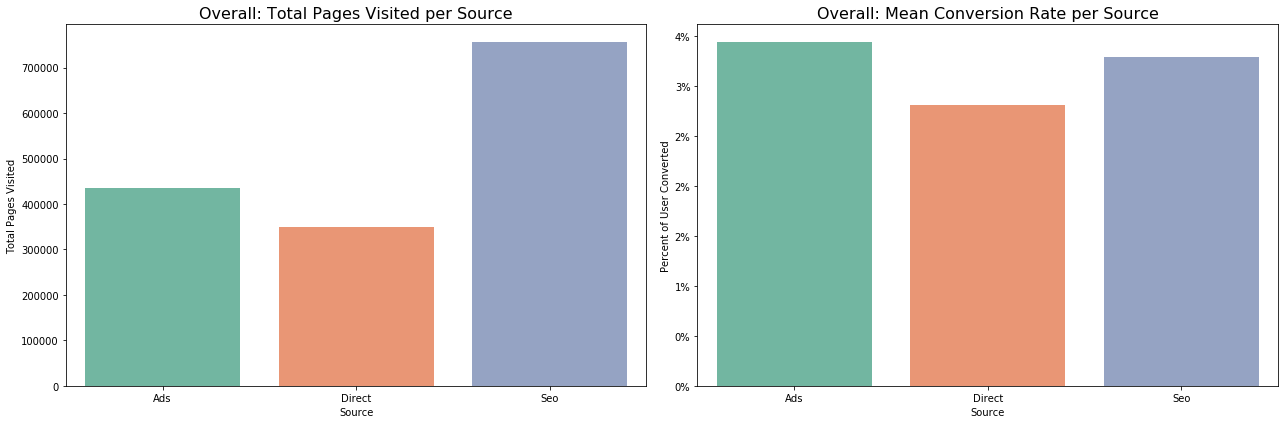

In [30]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

grouped_total_pages_data =data[['total_pages_visited', 'source']].groupby(['source']).sum().reset_index()   
sns.barplot(x='source', y='total_pages_visited', data=grouped_total_pages_data, ax=ax[0], palette = "Set2");
ax[0].set_title('Overall: Total Pages Visited per Source', fontsize=16)
ax[0].set_ylabel('Total Pages Visited')
ax[0].set_xlabel('Source')

grouped_source_data =data[['converted', 'source']].groupby(['source']).mean().reset_index()   
ax[1] = sns.barplot(x='source', y='converted', data=grouped_source_data,ax=ax[1],palette = "Set2");
ax[1].set_title('Overall: Mean Conversion Rate per Source', fontsize=16)
ax[1].yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 
ax[1].set_ylabel('Percent of User Converted')
ax[1].set_xlabel('Source')

plt.tight_layout()
plt.show()

<font color='PURPLE'>
<p>
[INSIGHT] 
<br> Even though less traffic is coming from Ads as compared to other sources but it achieves a considerable conversion rate.     
</p>
</font>

In [31]:
#Country Specific

In [32]:
#total pages by source
grouped_total_pages_data_us =data_us[['total_pages_visited','source']].groupby(['source']).sum().reset_index()
grouped_total_pages_data_uk =data_uk[['total_pages_visited','source']].groupby(['source']).sum().reset_index()
grouped_total_pages_data_china =data_china[['total_pages_visited','source']].groupby(['source']).sum().reset_index()
grouped_total_pages_data_germany =data_germany[['total_pages_visited','source']].groupby(['source']).sum().reset_index()

#converted by source
grouped_source_data_us =data_us[['converted','source']].groupby(['source']).mean().reset_index()
grouped_source_data_uk =data_uk[['converted','source']].groupby(['source']).mean().reset_index()
grouped_source_data_china =data_china[['converted','source']].groupby(['source']).mean().reset_index()
grouped_source_data_germany =data_germany[['converted','source']].groupby(['source']).mean().reset_index()

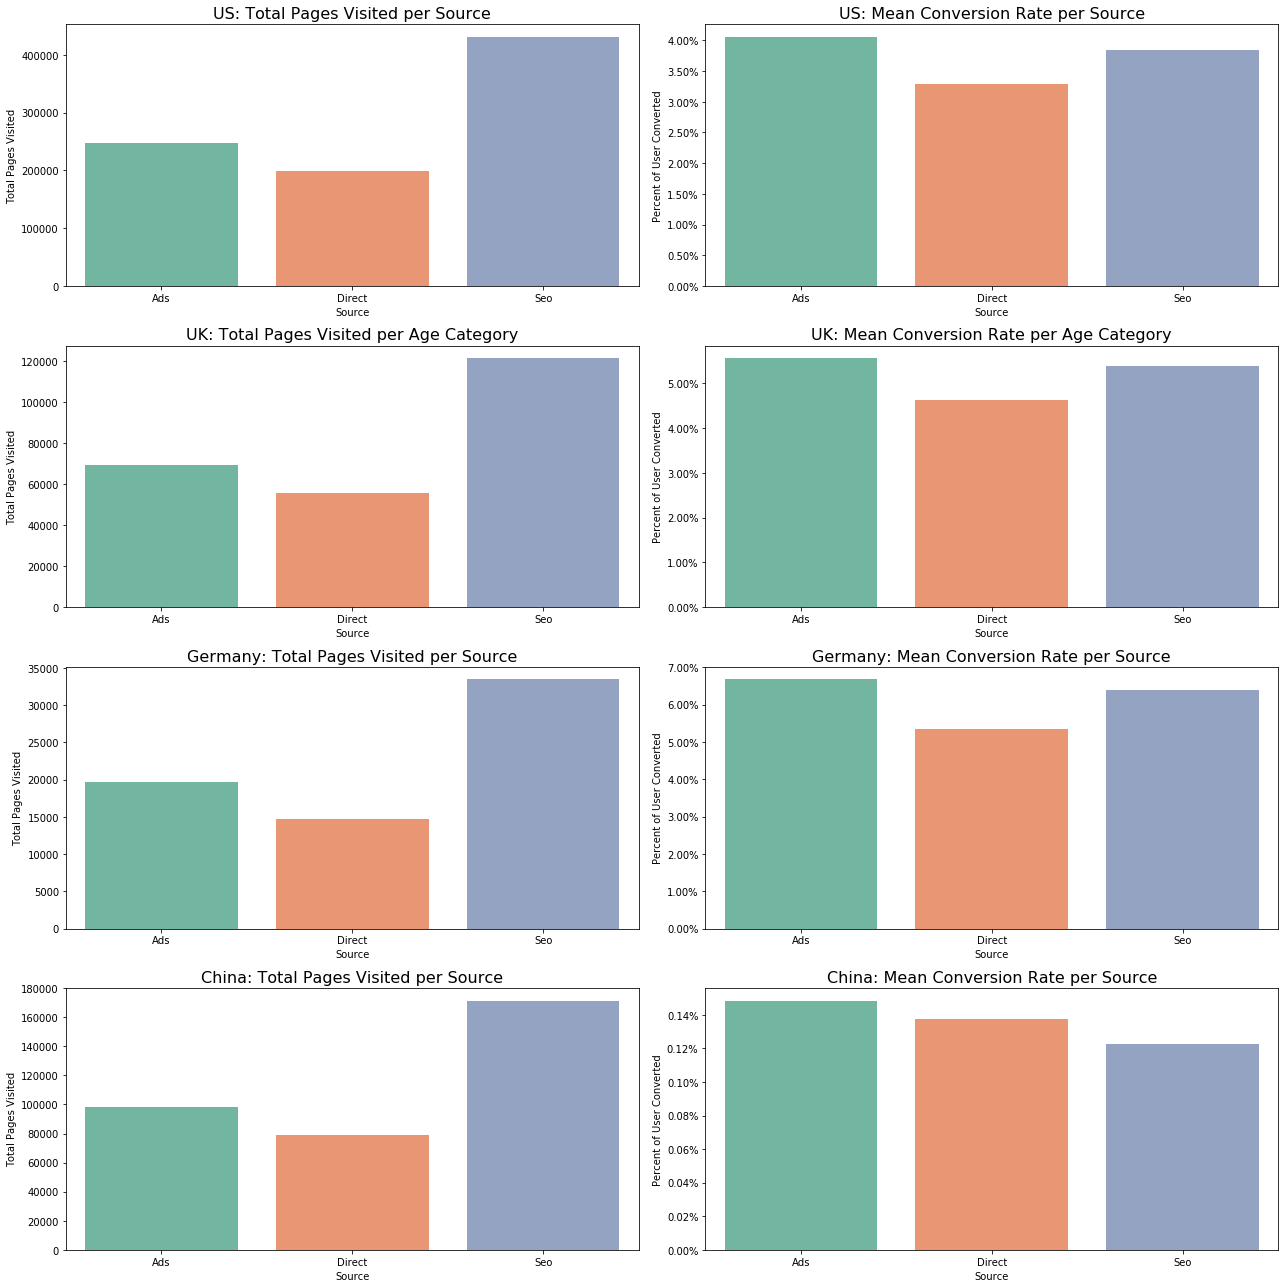

In [33]:
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(18, 18))

#Total Pages Visited per Source Category for each country 
#US
sns.barplot(x='source', y='total_pages_visited', data=grouped_total_pages_data_us, ax=ax[0][0], palette="Set2");
ax[0][0].set_title('US: Total Pages Visited per Source', fontsize=16)
ax[0][0].set_xlabel('Source')
ax[0][0].set_ylabel('Total Pages Visited')

sns.barplot(x='source', y='converted', data=grouped_source_data_us, ax=ax[0][1], palette="Set2");
ax[0][1].set_title('US: Mean Conversion Rate per Source', fontsize=16)
ax[0][1].yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.2%}'.format(y))) 
ax[0][1].set_ylabel('Percent of User Converted')
ax[0][1].set_xlabel('Source')

#UK
sns.barplot(x='source', y='total_pages_visited', data=grouped_total_pages_data_uk, ax=ax[1][0], palette = "Set2");
ax[1][0].set_title('UK: Total Pages Visited per Age Category', fontsize=16)
ax[1][0].set_xlabel('Source')
ax[1][0].set_ylabel('Total Pages Visited')

sns.barplot(x='source', y='converted', data=grouped_source_data_uk, ax=ax[1][1], palette = "Set2");
ax[1][1].set_title('UK: Mean Conversion Rate per Age Category', fontsize=16)
ax[1][1].yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.2%}'.format(y))) 
ax[1][1].set_ylabel('Percent of User Converted')
ax[1][1].set_xlabel('Source')

#Germany
sns.barplot(x='source', y='total_pages_visited', data=grouped_total_pages_data_germany, ax=ax[2][0], palette = "Set2");
ax[2][0].set_title('Germany: Total Pages Visited per Source', fontsize=16)
ax[2][0].set_xlabel('Source')
ax[2][0].set_ylabel('Total Pages Visited')

sns.barplot(x='source', y='converted', data=grouped_source_data_germany, ax=ax[2][1], palette = "Set2");
ax[2][1].set_title('Germany: Mean Conversion Rate per Source', fontsize=16)
ax[2][1].yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.2%}'.format(y))) 
ax[2][1].set_ylabel('Percent of User Converted')
ax[2][1].set_xlabel('Source')


#China
sns.barplot(x='source', y='total_pages_visited', data=grouped_total_pages_data_china, ax=ax[3][0], palette = "Set2");
ax[3][0].set_title('China: Total Pages Visited per Source', fontsize=16)
ax[3][0].set_xlabel('Source')
ax[3][0].set_ylabel('Total Pages Visited')

sns.barplot(x='source', y='converted', data=grouped_source_data_china, ax=ax[3][1], palette = "Set2");
ax[3][1].set_title('China: Mean Conversion Rate per Source', fontsize=16)
ax[3][1].yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.2%}'.format(y))) 
ax[3][1].set_ylabel('Percent of User Converted')
ax[3][1].set_xlabel('Source')

plt.tight_layout()
plt.show()


<font color='PURPLE'>
<p>
[INSIGHT] 
<br> [Others]: Even though less traffic is coming from Ads as compared to other sources but it achieves a considerable conversion. Specially true for UK and Germany. These countrties follow the global trend of Ad-conversion ratio with Germany and UK leading the pack.
<br> [China]: Majority traffic is from SEO i.e. users came from search results. So the site is coming in their search but conversion is really poor. Looks like the user experience is poor which is turning the Chinese population off.
    
</p>
</font>

#### Total Pages Visited and Mean Conversion Rate per User Category

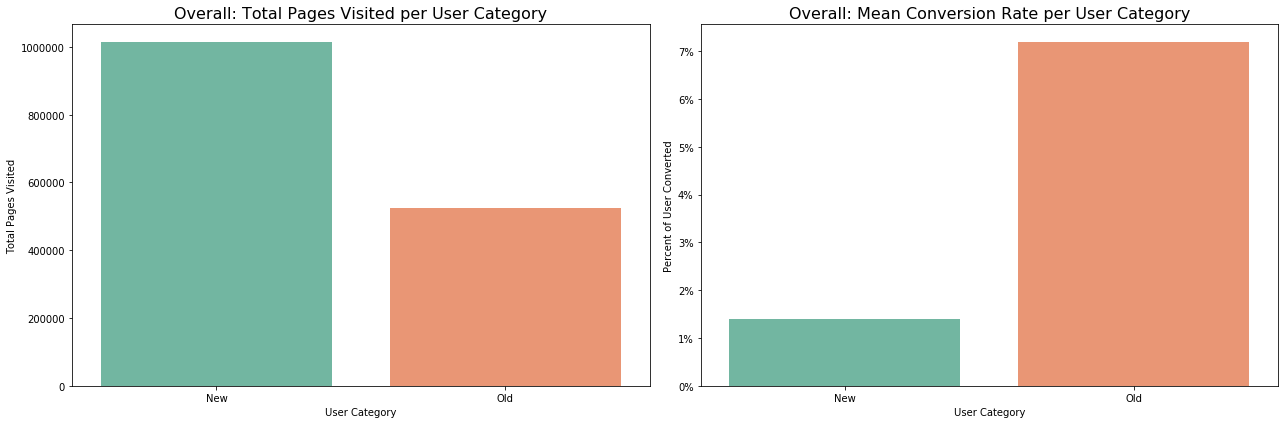

In [34]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

grouped_total_pages_data =data[['total_pages_visited', 'user_category']].groupby(['user_category']).sum().reset_index()   
sns.barplot(x='user_category', y='total_pages_visited', data=grouped_total_pages_data, ax=ax[0], palette = "Set2");
ax[0].set_title('Overall: Total Pages Visited per User Category', fontsize=16)
ax[0].set_ylabel('Total Pages Visited')
ax[0].set_xlabel('User Category')

grouped_user_catg_data =data[['converted', 'user_category']].groupby(['user_category']).mean().reset_index()   
ax[1] = sns.barplot(x='user_category', y='converted', data=grouped_user_catg_data,ax=ax[1],palette = "Set2");
ax[1].set_title('Overall: Mean Conversion Rate per User Category', fontsize=16)
ax[1].yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 
ax[1].set_ylabel('Percent of User Converted')
ax[1].set_xlabel('User Category')

plt.tight_layout()
plt.show()

<font color='PURPLE'>
<p>
[INSIGHT] 
<br> The existing users outnumbered by the new users but the old users have a considerably high conversion rate. Overall, it seems that once a user is converted they stick. It appears that first time conversion from new to old is the hardest.
</p>
</font>

In [35]:
#Country Specific

In [36]:
#total pages by user catg
grouped_total_pages_data_us =data_us[['total_pages_visited','user_category']].groupby(['user_category']).sum().reset_index()
grouped_total_pages_data_uk =data_uk[['total_pages_visited','user_category']].groupby(['user_category']).sum().reset_index()
grouped_total_pages_data_china =data_china[['total_pages_visited','user_category']].groupby(['user_category']).sum().reset_index()
grouped_total_pages_data_germany =data_germany[['total_pages_visited','user_category']].groupby(['user_category']).sum().reset_index()

#converted by user catg
grouped_usr_catg_data_us =data_us[['converted','user_category']].groupby(['user_category']).mean().reset_index()
grouped_usr_catg_data_uk =data_uk[['converted','user_category']].groupby(['user_category']).mean().reset_index()
grouped_usr_catg_data_china =data_china[['converted','user_category']].groupby(['user_category']).mean().reset_index()
grouped_usr_catg_data_germany =data_germany[['converted','user_category']].groupby(['user_category']).mean().reset_index()

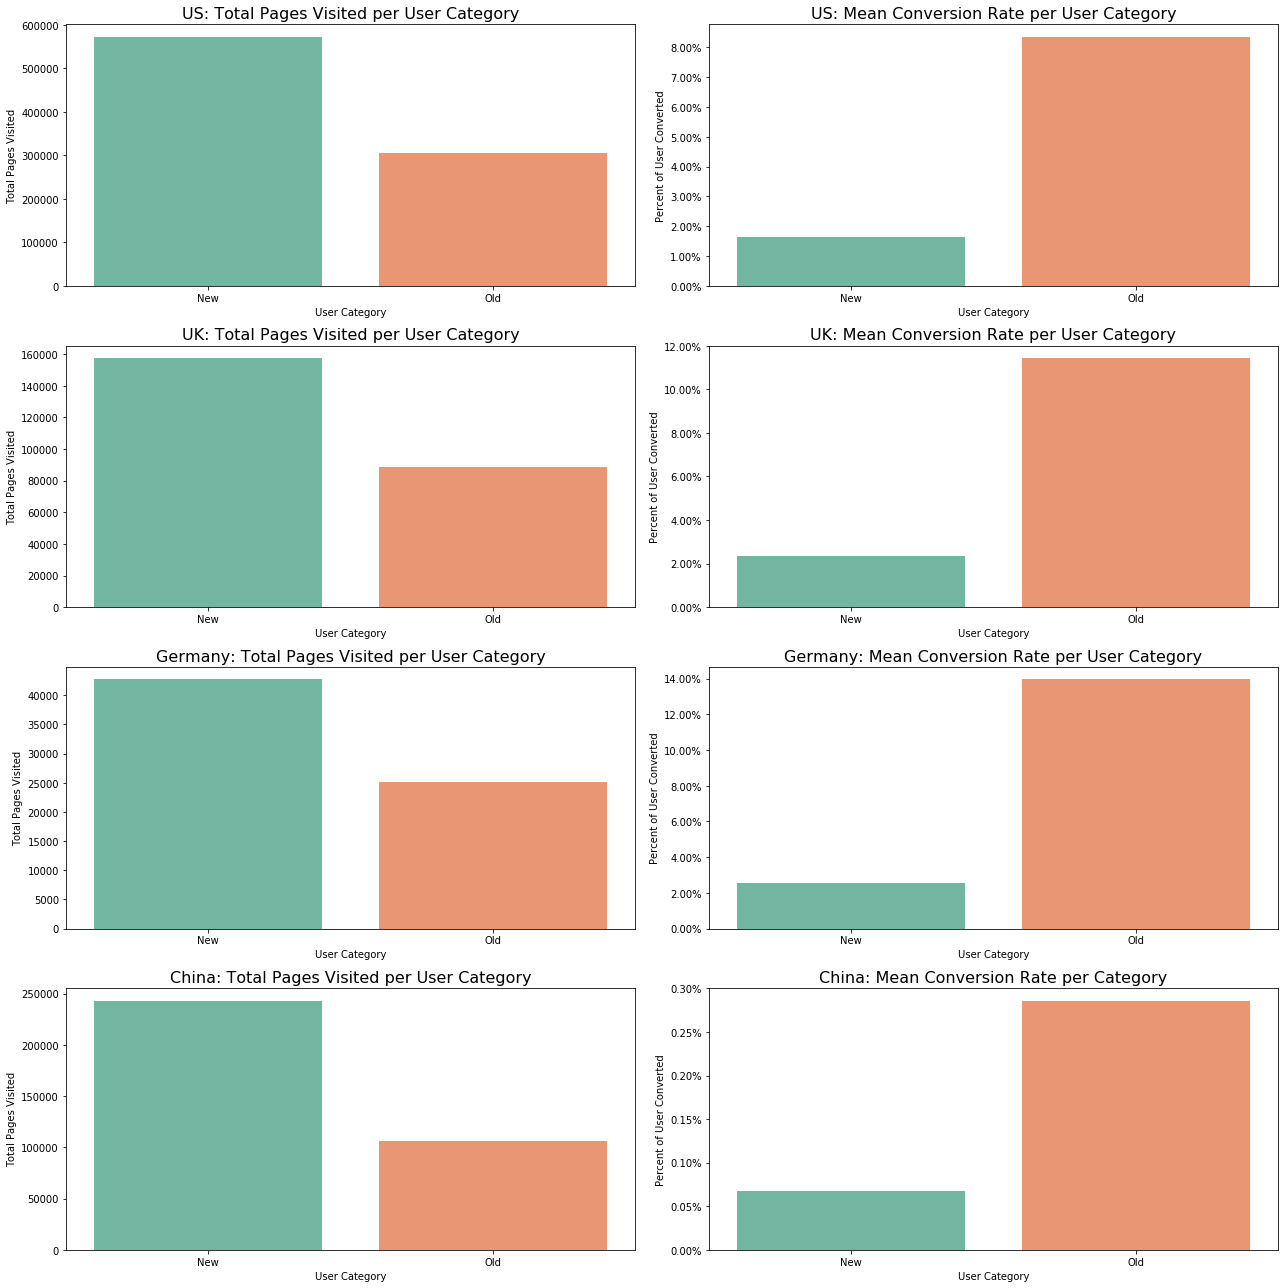

In [37]:
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(18, 18))

#Total Pages Visited per user Category for each country 
#US
sns.barplot(x='user_category', y='total_pages_visited', data=grouped_total_pages_data_us, ax=ax[0][0], palette="Set2");
ax[0][0].set_title('US: Total Pages Visited per User Category', fontsize=16)
ax[0][0].set_xlabel('User Category')
ax[0][0].set_ylabel('Total Pages Visited')

sns.barplot(x='user_category', y='converted', data=grouped_usr_catg_data_us, ax=ax[0][1], palette="Set2");
ax[0][1].set_title('US: Mean Conversion Rate per User Category', fontsize=16)
ax[0][1].yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.2%}'.format(y))) 
ax[0][1].set_ylabel('Percent of User Converted')
ax[0][1].set_xlabel('User Category')

#UK
sns.barplot(x='user_category', y='total_pages_visited', data=grouped_total_pages_data_uk, ax=ax[1][0], palette = "Set2");
ax[1][0].set_title('UK: Total Pages Visited per User Category', fontsize=16)
ax[1][0].set_xlabel('User Category')
ax[1][0].set_ylabel('Total Pages Visited')

sns.barplot(x='user_category', y='converted', data=grouped_usr_catg_data_uk, ax=ax[1][1], palette = "Set2");
ax[1][1].set_title('UK: Mean Conversion Rate per User Category', fontsize=16)
ax[1][1].yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.2%}'.format(y))) 
ax[1][1].set_ylabel('Percent of User Converted')
ax[1][1].set_xlabel('User Category')

#Germany
sns.barplot(x='user_category', y='total_pages_visited', data=grouped_total_pages_data_germany, ax=ax[2][0], palette = "Set2");
ax[2][0].set_title('Germany: Total Pages Visited per User Category', fontsize=16)
ax[2][0].set_xlabel('User Category')
ax[2][0].set_ylabel('Total Pages Visited')

sns.barplot(x='user_category', y='converted', data=grouped_usr_catg_data_germany, ax=ax[2][1], palette = "Set2");
ax[2][1].set_title('Germany: Mean Conversion Rate per User Category', fontsize=16)
ax[2][1].yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.2%}'.format(y))) 
ax[2][1].set_ylabel('Percent of User Converted')
ax[2][1].set_xlabel('User Category')


#China
sns.barplot(x='user_category', y='total_pages_visited', data=grouped_total_pages_data_china, ax=ax[3][0], palette = "Set2");
ax[3][0].set_title('China: Total Pages Visited per User Category', fontsize=16)
ax[3][0].set_xlabel('User Category')
ax[3][0].set_ylabel('Total Pages Visited')

sns.barplot(x='user_category', y='converted', data=grouped_usr_catg_data_china, ax=ax[3][1], palette = "Set2");
ax[3][1].set_title('China: Mean Conversion Rate per Category', fontsize=16)
ax[3][1].yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.2%}'.format(y))) 
ax[3][1].set_ylabel('Percent of User Converted')
ax[3][1].set_xlabel('User Category')

plt.tight_layout()
plt.show()


<font color='PURPLE'>
<p>
[INSIGHT] 
<br> Overall the specific countries seem to follow the overall trend. Germany achieves the best conversion rate ratio and China the worst
both for new and existing users.
</p>
</font>

## Machine Learning

In [38]:
import h2o
from h2o.frame import H2OFrame
from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.grid.grid_search import H2OGridSearch

from sklearn.metrics import auc, roc_curve, classification_report

In [39]:
h2o.init()
h2o.remove_all()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,4 mins 57 secs
H2O cluster timezone:,America/New_York
H2O data parsing timezone:,UTC
H2O cluster version:,3.18.0.2
H2O cluster version age:,8 months and 7 days !!!
H2O cluster name:,H2O_from_python_uditanand_uj3wv9
H2O cluster total nodes:,1
H2O cluster free memory:,1.718 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"locked, healthy"


In [40]:
h2o_df = H2OFrame(data)

h2o_df['new_user'] = h2o_df['new_user'].asfactor()
h2o_df['converted'] = h2o_df['converted'].asfactor()
h2o_df['age_category'] = h2o_df['age_category'].asfactor()
h2o_df['existing_users'] = h2o_df['existing_users'].asfactor()
h2o_df['user_category'] = h2o_df['user_category'].asfactor()

/Users/uditanand/anaconda3/lib/python3.6/site-packages/h2o/utils/shared_utils.py:170: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  data = _handle_python_lists(python_obj.as_matrix().tolist(), -1)[1]


Parse progress: |█████████████████████████████████████████████████████████| 100%


In [41]:
h2o_df.summary()

,country,age,new_user,source,total_pages_visited,converted,age_category,existing_users,user_category
type,enum,int,enum,enum,int,enum,enum,enum,enum
mins,,17.0,,,1.0,,,,
mean,,30.56931100133478,,,4.872918234777003,,,,
maxs,,79.0,,,29.0,,,,
sigma,,8.26895759642147,,,3.3410533442156116,,,,
zeros,,0,,,0,,,,
missing,0,0,0,0,0,0,0,0,0
0,UK,25.0,1,Ads,1.0,0,Cat1,0,New
1,US,23.0,1,Seo,5.0,0,Cat1,0,New
2,US,28.0,1,Seo,4.0,0,Cat1,0,New


In [42]:
#Split into 75% training and 25% test dataset
strat_split = h2o_df['converted'].stratified_split(test_frac=0.25, seed=42)

train = h2o_df[strat_split == 'train']
test = h2o_df[strat_split == 'test']

feature = ['country', 'age', 'new_user', 'source', 'total_pages_visited','age_category', 'user_category']
target = 'converted'

In [43]:
# Build random forest model
model = H2ORandomForestEstimator(balance_classes=True, ntrees=100, max_depth=20, 
                                 mtries=-1, seed=42, score_each_iteration=True)
model.train(x=feature, y=target, training_frame=train)

drf Model Build progress: |███████████████████████████████████████████████| 100%


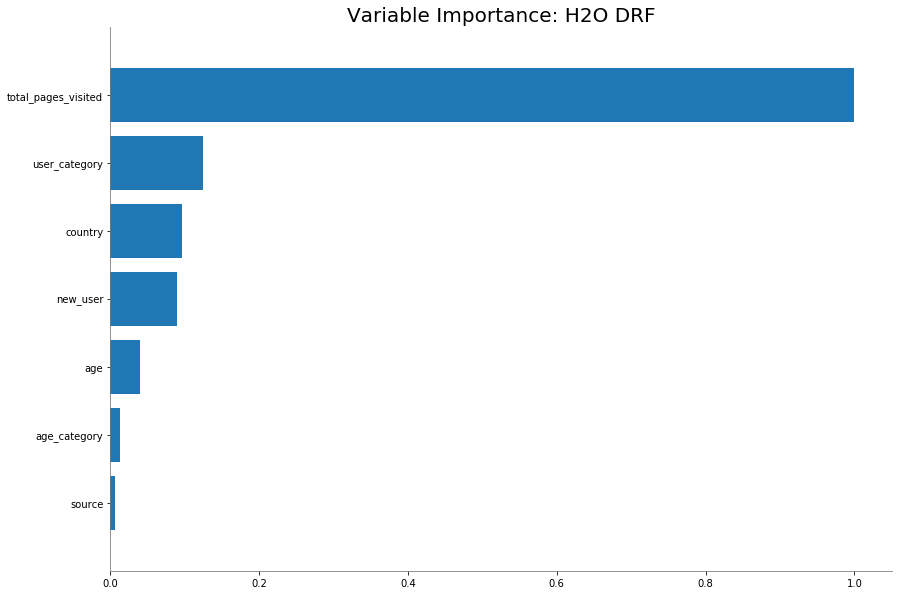

In [44]:
model.varimp_plot()

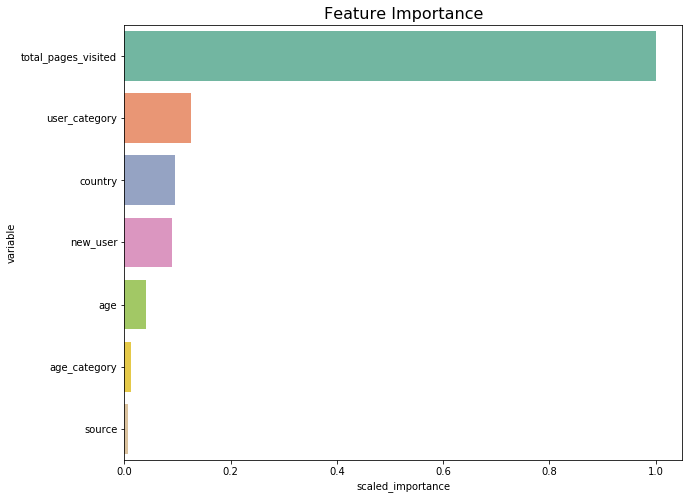

In [45]:
# Feature importance
importance = model.varimp(use_pandas=True)

fig, ax = plt.subplots(figsize=(10, 8))
ax.set_title('Feature Importance', fontsize=16)
sns.barplot(x='scaled_importance', y='variable', data=importance, palette = "Set2")


plt.show()

In [46]:
# Make predictions
train_true = train.as_data_frame()['converted'].values
test_true = test.as_data_frame()['converted'].values
train_pred = model.predict(train).as_data_frame()['p1'].values
test_pred = model.predict(test).as_data_frame()['p1'].values

train_fpr, train_tpr, _ = roc_curve(train_true, train_pred)
test_fpr, test_tpr, _ = roc_curve(test_true, test_pred)
train_auc = np.round(auc(train_fpr, train_tpr), 3)
test_auc = np.round(auc(test_fpr, test_tpr), 3)

drf prediction progress: |████████████████████████████████████████████████| 100%
drf prediction progress: |████████████████████████████████████████████████| 100%


In [47]:
# Classification report
print(classification_report(y_true=test_true, y_pred=(test_pred > 0.5).astype(int)))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     76500
           1       0.95      0.09      0.16      2550

   micro avg       0.97      0.97      0.97     79050
   macro avg       0.96      0.54      0.57     79050
weighted avg       0.97      0.97      0.96     79050



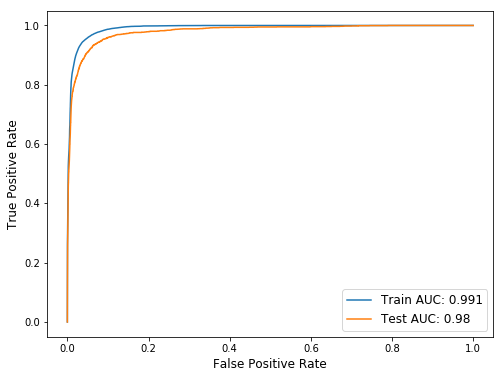

In [48]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(train_fpr, train_tpr, label='Train AUC: ' + str(train_auc))
ax.plot(test_fpr, test_tpr, label='Test AUC: ' + str(test_auc))
ax.set_xlabel('False Positive Rate', fontsize=12)
ax.set_ylabel('True Positive Rate', fontsize=12)
ax.legend(fontsize=12)
plt.show()

PartialDependencePlot progress: |█████████████████████████████████████████| 100%


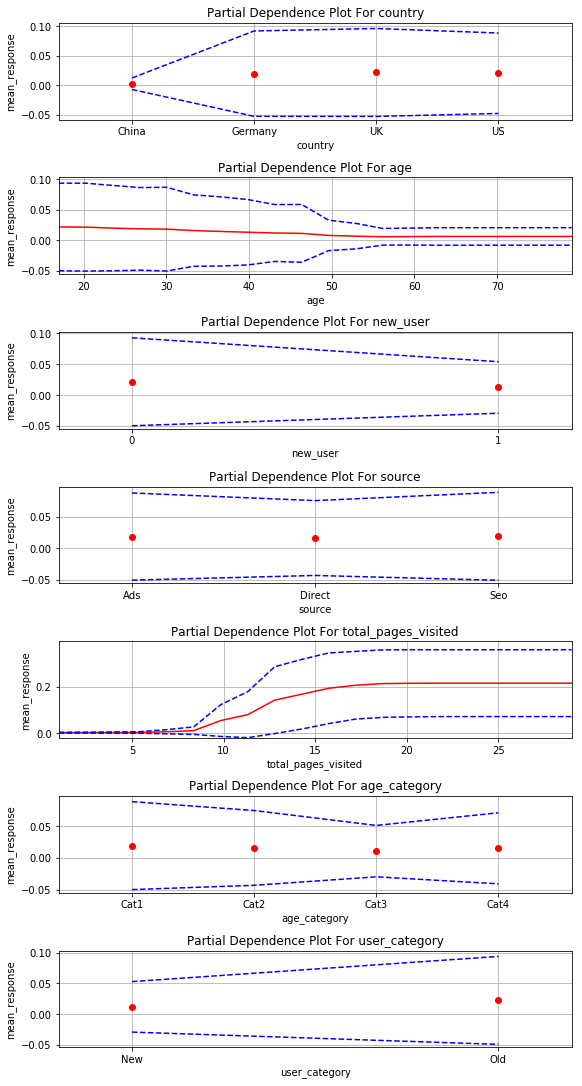

In [49]:
_ = model.partial_plot(train, cols=feature, figsize=(8, 15))

In [50]:
### Removing variable 'total_pages_visited', 'new_user' and 'age' and making the model again.
### Since it is difficult to convert page visited to actionable insights want to remove it.
### Have derived variables 'user_category' and 'age_category' as proxies to new_user and age.

In [51]:
#Split into 75% training and 25% test dataset
strat_split = h2o_df['converted'].stratified_split(test_frac=0.25, seed=42)

train = h2o_df[strat_split == 'train']
test = h2o_df[strat_split == 'test']

feature = ['country', 'source','age_category', 'user_category']
target = 'converted'

In [52]:
#Build random forest model
model = H2ORandomForestEstimator(balance_classes=True, ntrees=100, max_depth=20, 
                                 mtries=-1, seed=42, score_each_iteration=True)
model.train(x=feature, y=target, training_frame=train)

drf Model Build progress: |███████████████████████████████████████████████| 100%


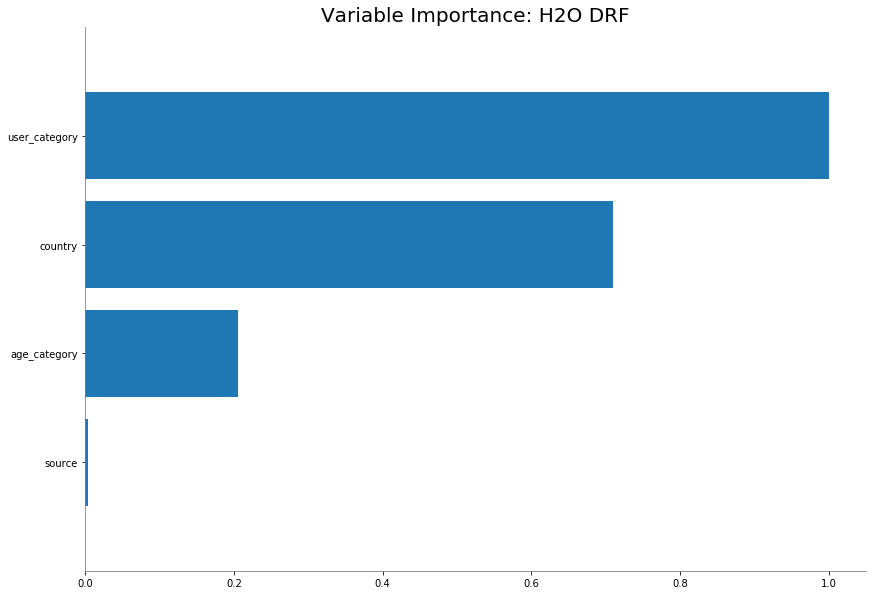

In [53]:
model.varimp_plot()

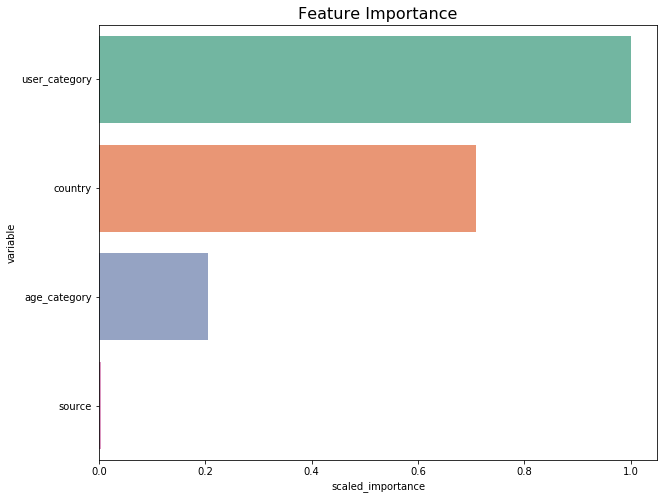

In [54]:
#Feature importance
importance = model.varimp(use_pandas=True)

fig, ax = plt.subplots(figsize=(10, 8))
ax.set_title('Feature Importance', fontsize=16)
sns.barplot(x='scaled_importance', y='variable', data=importance, palette = "Set2")


plt.show()

In [55]:
#Make predictions
train_true = train.as_data_frame()['converted'].values
test_true = test.as_data_frame()['converted'].values
train_pred = model.predict(train).as_data_frame()['p1'].values
test_pred = model.predict(test).as_data_frame()['p1'].values

train_fpr, train_tpr, _ = roc_curve(train_true, train_pred)
test_fpr, test_tpr, _ = roc_curve(test_true, test_pred)
train_auc = np.round(auc(train_fpr, train_tpr), 3)
test_auc = np.round(auc(test_fpr, test_tpr), 3)

drf prediction progress: |████████████████████████████████████████████████| 100%
drf prediction progress: |████████████████████████████████████████████████| 100%


In [56]:
# Classification report
print(classification_report(y_true=test_true, y_pred=(test_pred > 0.5).astype(int)))

/Users/uditanand/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/uditanand/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/uditanand/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.97      1.00      0.98     76500
           1       0.00      0.00      0.00      2550

   micro avg       0.97      0.97      0.97     79050
   macro avg       0.48      0.50      0.49     79050
weighted avg       0.94      0.97      0.95     79050



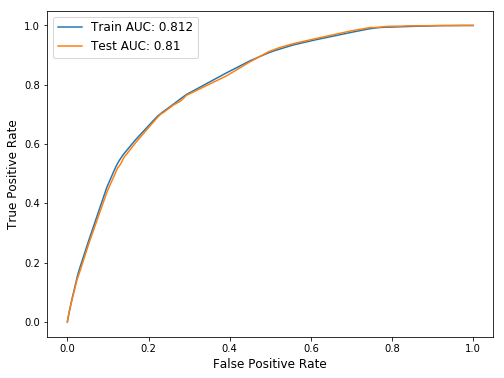

In [57]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(train_fpr, train_tpr, label='Train AUC: ' + str(train_auc))
ax.plot(test_fpr, test_tpr, label='Test AUC: ' + str(test_auc))
ax.set_xlabel('False Positive Rate', fontsize=12)
ax.set_ylabel('True Positive Rate', fontsize=12)
ax.legend(fontsize=12)
plt.show()

PartialDependencePlot progress: |█████████████████████████████████████████| 100%


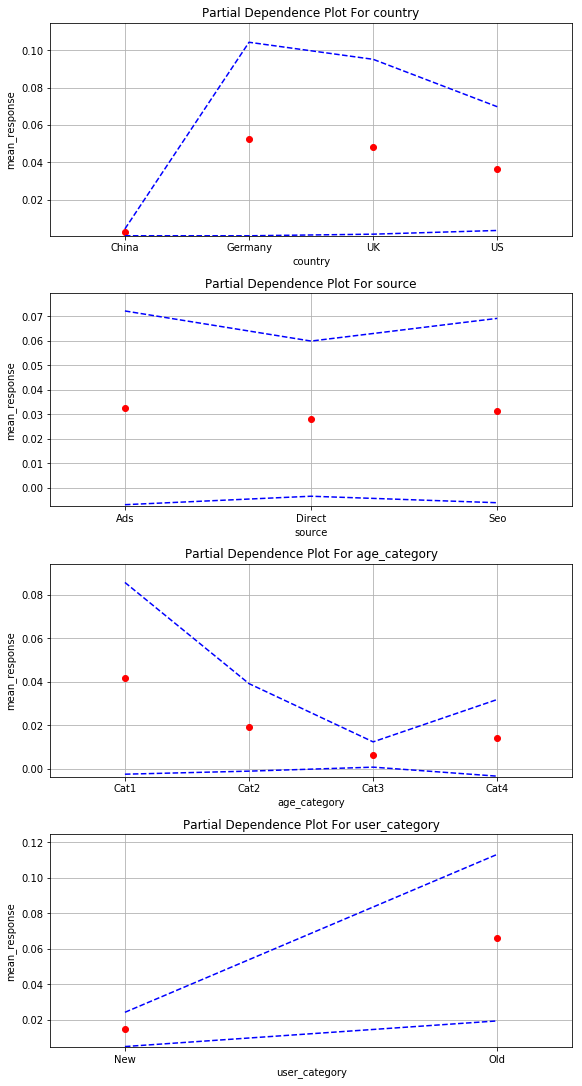

In [58]:
_ = model.partial_plot(train, cols=feature, figsize=(8, 15))

In [59]:
# Shutdown h2o instance
h2o.cluster().shutdown()

H2O session _sid_95c1 closed.


<font color='PURPLE'>
<p>
[ML INSIGHT and Overall Summary] 
<br> The ML model's insights are somewhat in sync with the insights generated in the first part.
<br> Old users seem to be loyal and the toughest time is converting the old to new.
<br> Germany seems to have the best conversion rate and China the worst.
<br> The predominant age group of converted people is between 17-50 years old (Cat1 and Cat2)
<br> An additional insight from the ML model seems to be that source is irrelevant when it comes to conversion
</p>
</font>